<a href="https://colab.research.google.com/github/u3228058/CapstoneGroupProject/blob/main/CaptsoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Read Datasets
wc = pd.read_csv('/content/Wholesale customers data.csv')


In [ ]:
#First 5 rows
wc.head()

In [ ]:
#Last 5 rows
wc.tail()

In [ ]:
#Rows and Columns
wc.shape

In [ ]:
wc.nunique()

In [ ]:
wc.info()

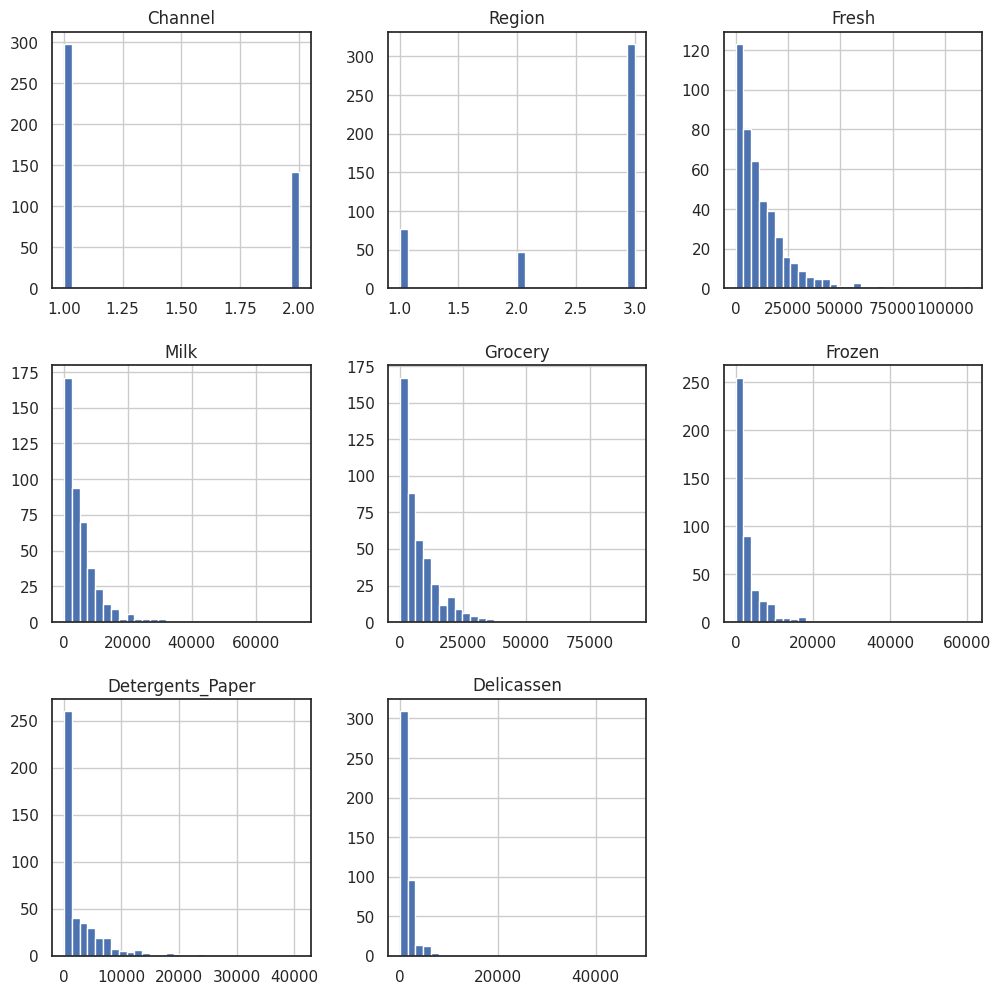

In [38]:
fig = plt.figure(figsize =(12,12))
ax=fig.gca()
wc.hist(ax=ax,bins =30)
plt.show()

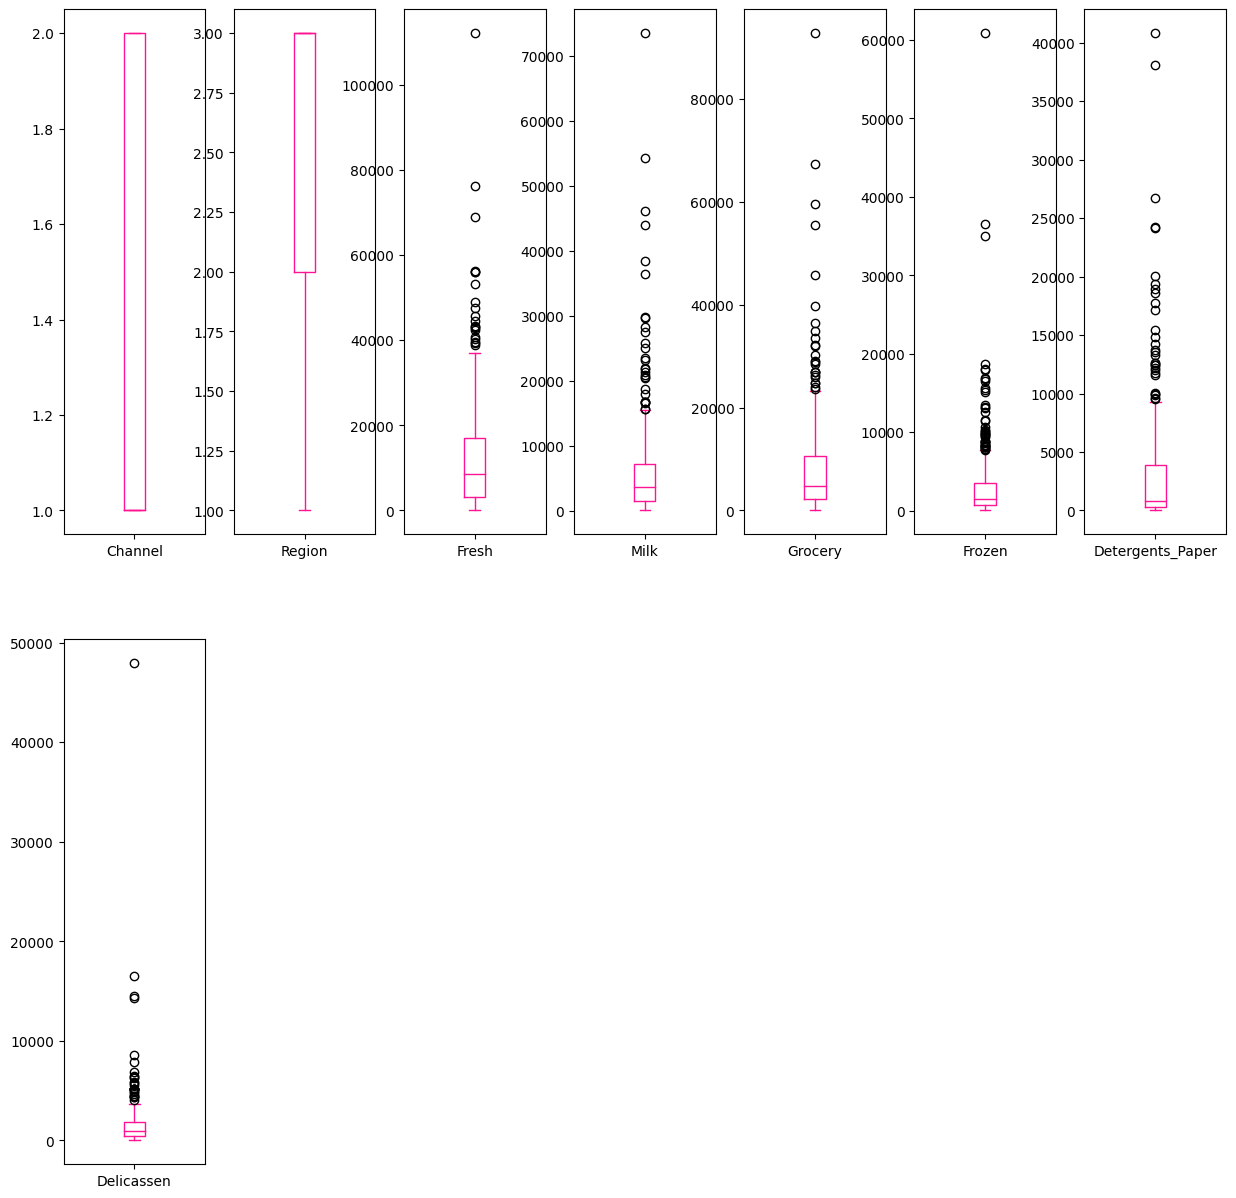

In [10]:
wc.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False, figsize=(15, 15), color='deeppink');

In [3]:
#identify outliers
continous_features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
def outliers(wc_out, drop = False):
  for each_feature in wc_out.columns:
    feature_data = wc_out[each_feature]
    Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 #That's we were talking about above
    outliers = feature_data[~((feature_data >= Q1 -outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
    if drop:
      wc.drop(outliers, inplace = True, errors = 'ignore')
      print('Outliers from {} feature removed'.format(each_feature))
outliers(wc[continous_features])


For the feature Fresh, No of Outliers is 20
For the feature Milk, No of Outliers is 28
For the feature Grocery, No of Outliers is 24
For the feature Frozen, No of Outliers is 43
For the feature Detergents_Paper, No of Outliers is 30
For the feature Delicassen, No of Outliers is 27


In [4]:
#remove the outliers
outliers(wc[continous_features], drop = True)

Outliers from Fresh feature removed
Outliers from Milk feature removed
Outliers from Grocery feature removed
Outliers from Frozen feature removed
Outliers from Detergents_Paper feature removed
Outliers from Delicassen feature removed


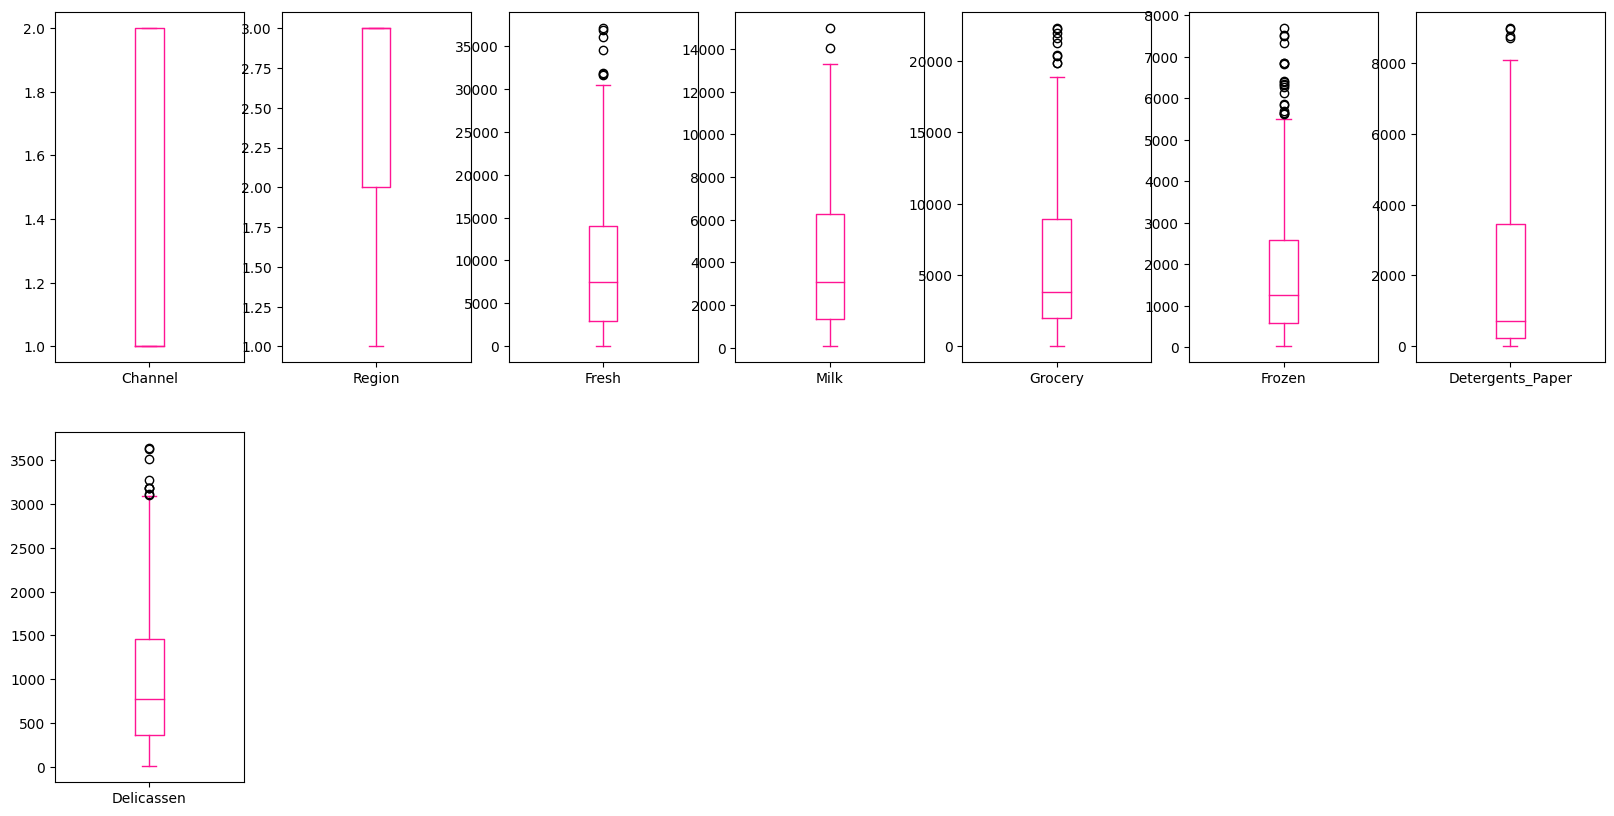

In [7]:
#Check outliers removed
wc.plot(kind='box', subplots=True,
layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

In [39]:
#Check data shape after outliers removed
wc.shape

(440, 8)

1    298
2    142
Name: Channel, dtype: int64


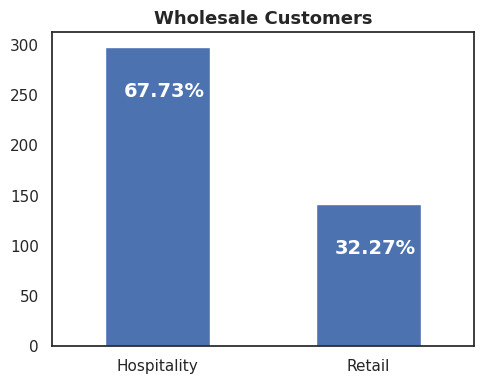

In [41]:
#checking target value distribution
print(wc.Channel.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Hospitality", "Retail"]
ax = wc.Channel.value_counts().plot(kind='bar')
ax.set_title("Wholesale Customers", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
# To calculate the percentage
totals = []
for i in ax.patches:
  totals.append(i.get_height())
  total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
    str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
    color='white', weight = 'bold')
plt.tight_layout()

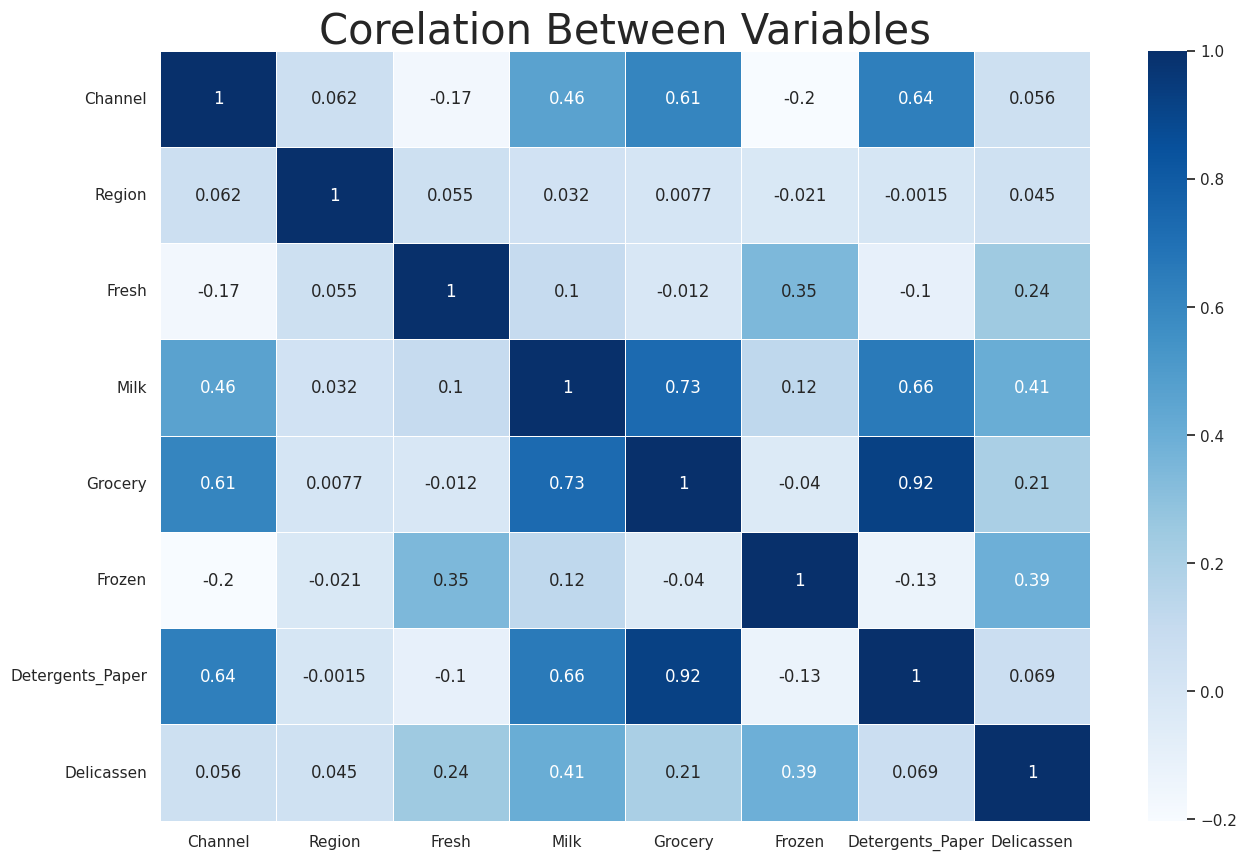

In [40]:
#check correlation between variables
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(wc.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

3    239
1     60
2     33
Name: Region, dtype: int64


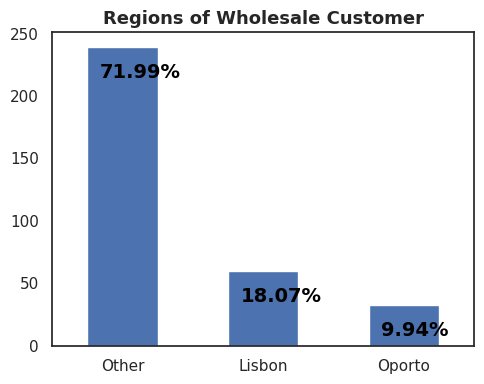

In [9]:
#checking target value distribution
print(wc.Region.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Other","Lisbon", "Oporto"]
ax = wc.Region.value_counts().plot(kind='bar')
ax.set_title("Regions of Wholesale Customer", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
# To calculate the percentage
totals = []
for i in ax.patches:
  totals.append(i.get_height())
  total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-25, \
    str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
    color='black', weight = 'bold')
plt.tight_layout()

In [16]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.6 MB 21.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=99e4fcf41c40e73cbf7ee82a6682048739679bc2efaaf21ff59e96d777105c62
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [18]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(wc,title="Wholesale Customer EDA",html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#decoded in to common object data types
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
for col in wc:
  if wc[col].dtype =='object':
    wc[col]=OrdinalEncoder().fit_transform(wc[col].values.reshape(-1,1))
wc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [43]:
class_label =wc['Channel']
wc = wc.drop(['Channel'], axis =1)
wc = (wc-wc.min())/(wc.max()-wc.min())
wc['Channel']=class_label
wc

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,2
1,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,2
2,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,2
3,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,2
...,...,...,...,...,...,...,...,...
435,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,1
436,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,1
437,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,2
438,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1


In [44]:
wholesaleCustomer_data = wc.copy()
le = preprocessing.LabelEncoder()
Channel = le.fit_transform(list(wholesaleCustomer_data["Channel"])) # Industry (1= Hospitality ;2= Retail )
Region = le.fit_transform(list(wholesaleCustomer_data["Region"])) # Region (1 = Lisbon; 2 = Oporto; 3 = Other)
Fresh = le.fit_transform(list(wholesaleCustomer_data["Fresh"])) # fresh products
Milk = le.fit_transform(list(wholesaleCustomer_data["Milk"])) # milk products
Grocery = le.fit_transform(list(wholesaleCustomer_data["Grocery"])) # grocery products
Frozen = le.fit_transform(list(wholesaleCustomer_data["Frozen"])) # frozen products
Detergents_Paper = le.fit_transform(list(wholesaleCustomer_data["Detergents_Paper"])) # detergents and paper products
Delicassen = le.fit_transform(list(wholesaleCustomer_data["Delicassen"])) #delicatessen products


In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
x = list(zip(Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen))
y = list(Channel)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'
# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higherdata it already has seen that information and knows
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)

((352, 7), (88, 7))

In [47]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 0.909256 (0.038378)

SVM: 0.920684 (0.040256)

GBM: 0.906398 (0.032690)

RF: 0.912153 (0.039041)



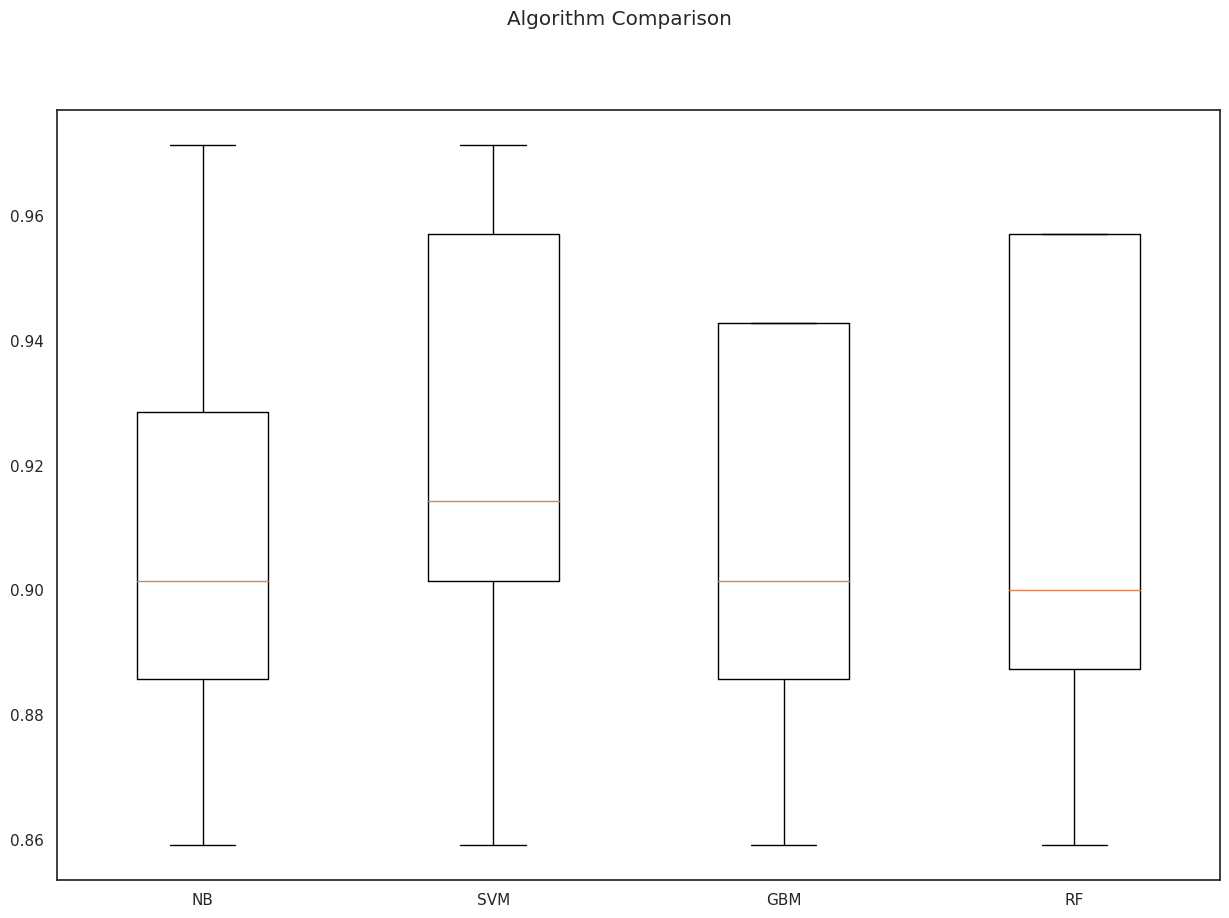

In [48]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
#Model Evaluation by testing with independent/external test data set.
# Make predictions on validation/test dataset
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svm = SVC(probability=True)
best_model = svm
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.9431818181818182


In [50]:
#Model Performance Evaluation Metric 1 -Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.87      0.96      0.92        28

    accuracy                           0.94        88
   macro avg       0.93      0.95      0.94        88
weighted avg       0.95      0.94      0.94        88



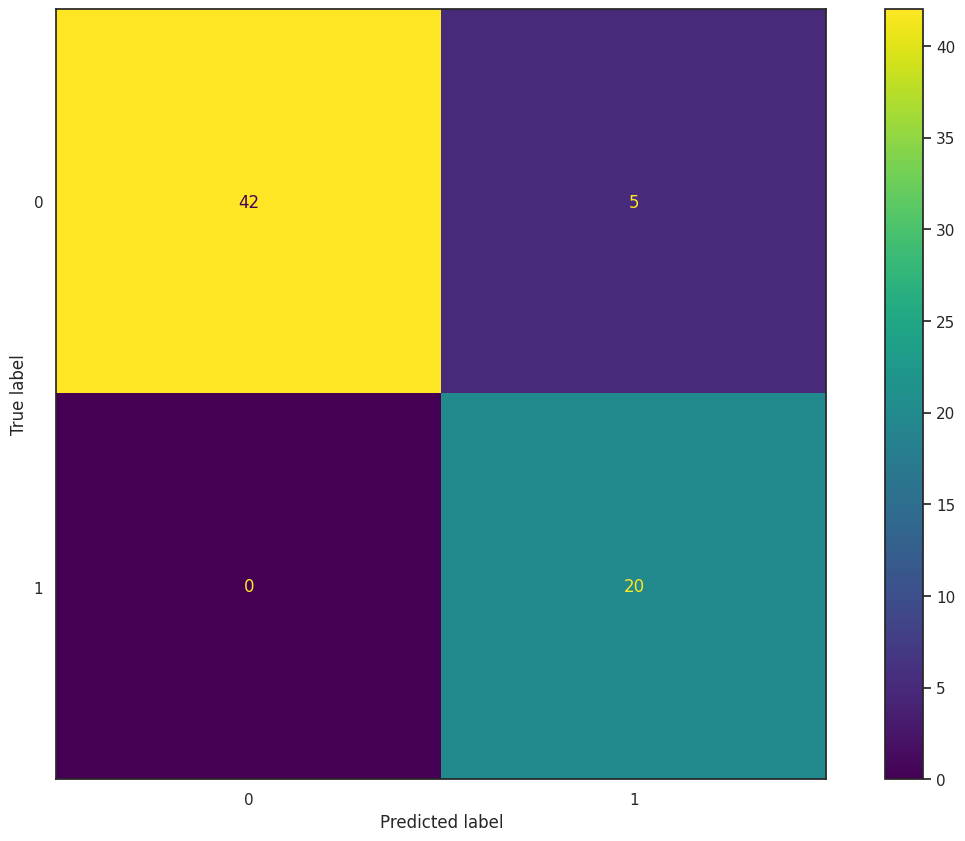

In [32]:
#Model Performance Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

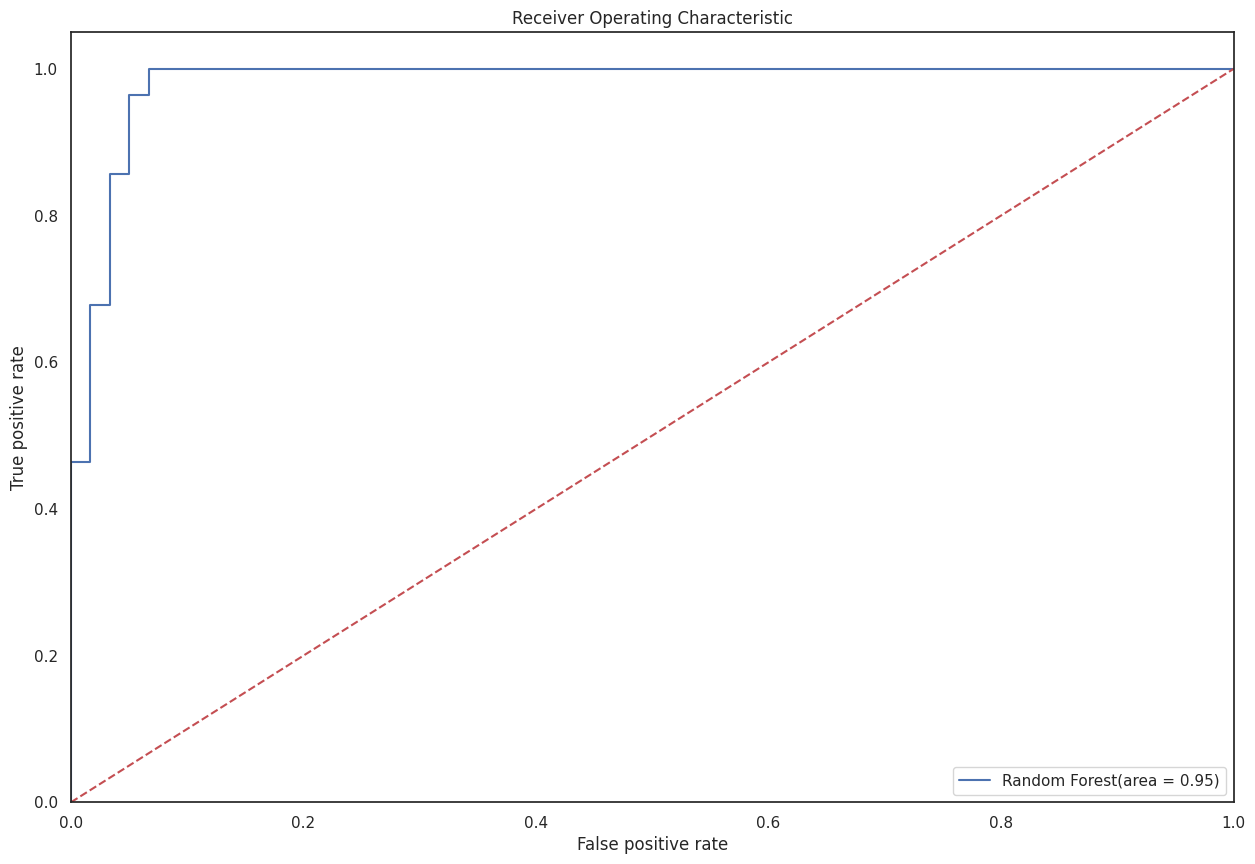

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = SVC(probability=True)
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

In [36]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  0 Actual:  0 Data:  (2, 110, 39, 31, 271, 46, 169)
Predicted:  0 Actual:  0 Data:  (1, 186, 108, 189, 243, 73, 185)
Predicted:  0 Actual:  0 Data:  (2, 17, 4, 14, 96, 14, 13)
Predicted:  1 Actual:  1 Data:  (2, 45, 235, 266, 15, 299, 250)
Predicted:  0 Actual:  0 Data:  (2, 88, 189, 312, 77, 78, 260)
Predicted:  0 Actual:  0 Data:  (0, 105, 125, 52, 220, 86, 127)
Predicted:  0 Actual:  0 Data:  (2, 173, 238, 26, 210, 16, 46)
Predicted:  1 Actual:  1 Data:  (2, 207, 259, 305, 22, 301, 7)
Predicted:  0 Actual:  0 Data:  (1, 198, 42, 106, 288, 57, 60)
Predicted:  0 Actual:  0 Data:  (2, 304, 182, 196, 266, 126, 296)
Predicted:  0 Actual:  0 Data:  (2, 114, 45, 169, 23, 188, 64)
Predicted:  1 Actual:  0 Data:  (2, 264, 185, 231, 91, 211, 151)
Predicted:  0 Actual:  0 Data:  (0, 258, 209, 107, 74, 140, 111)
Predicted:  1 Actual:  0 Data:  (2, 306, 298, 175, 12, 149, 55)
Predicted:  1 Actual:  1 Data:  (2, 252, 291, 292, 199, 289, 135)
Predicted:  0 Actual:  0 Data:  (2, 27, 0, 1